In [1]:
#install folium
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import imports
import pandas as pd 
import matplotlib.pyplot as plt 
import geopandas as gpd
import folium
from shapely.geometry import Polygon, LineString, Point
from folium.plugins import HeatMap 


In [3]:
#Shapefile of all 50 states, but no label on the State names or any other state data. 
states_shp = gpd.read_file("tl_2012_us_state.shp")
states_shp
#https://www.diva-gis.org/datadown

,geometry
0,"MULTIPOLYGON (((-17361760.204 2164544.588, -17..."
1,"POLYGON ((-10515267.713 4101325.818, -10515269..."
2,"POLYGON ((-12138963.727 4106855.170, -12138964..."
3,"POLYGON ((-12727480.235 5886876.586, -12727567..."
4,"MULTIPOLYGON (((-8866092.533 5160809.769, -886..."
5,"POLYGON ((-11582613.606 6227717.739, -11582612..."
6,"POLYGON ((-11583304.027 5487755.962, -11583301..."
7,"POLYGON ((-12576795.155 5160745.479, -12576496..."
8,"POLYGON ((-13625641.088 5711873.575, -13625180..."
9,"POLYGON ((-13029028.568 6063029.797, -13029028..."


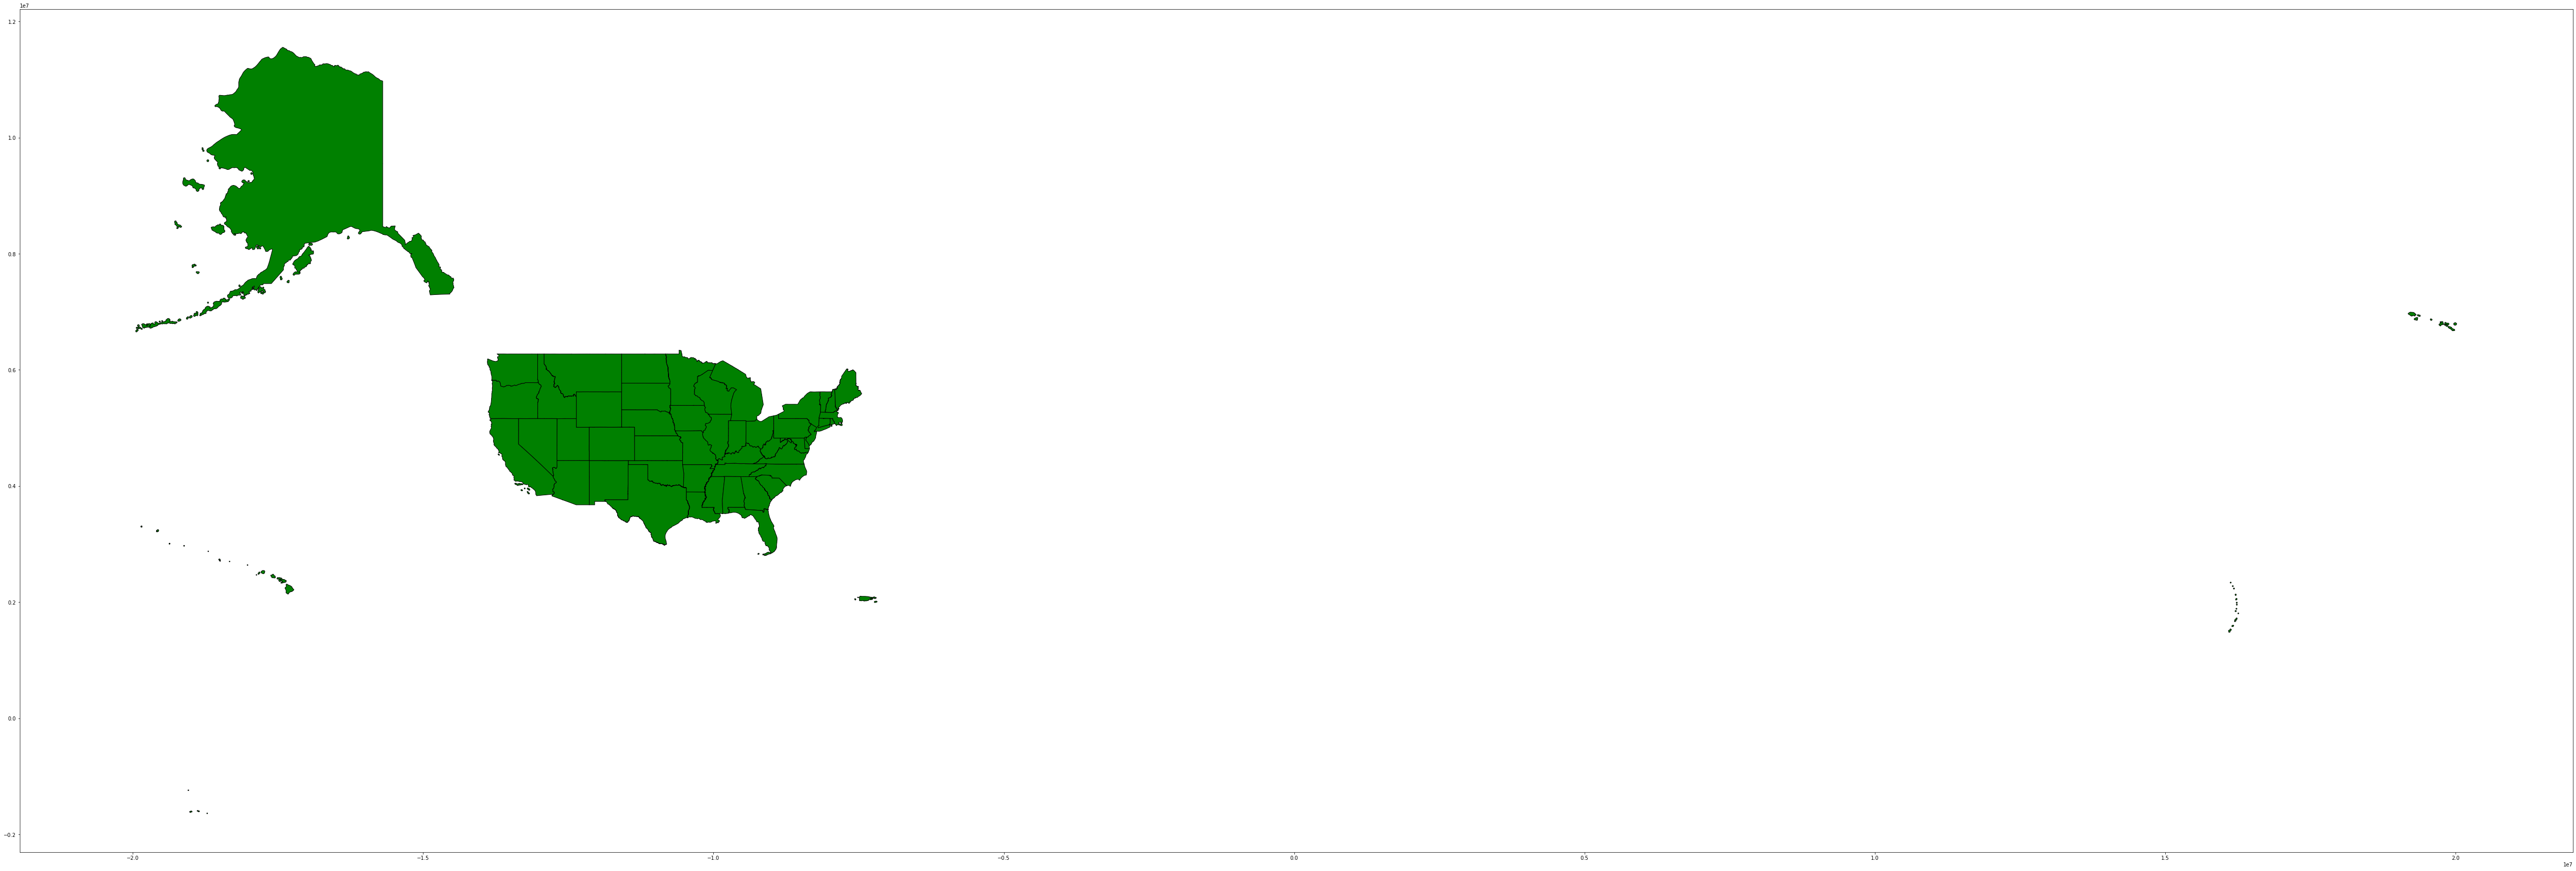

In [4]:
#simple plot of the USA
states_shp.plot(figsize=(90, 60), edgecolor='black', color = 'g') 
#https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73

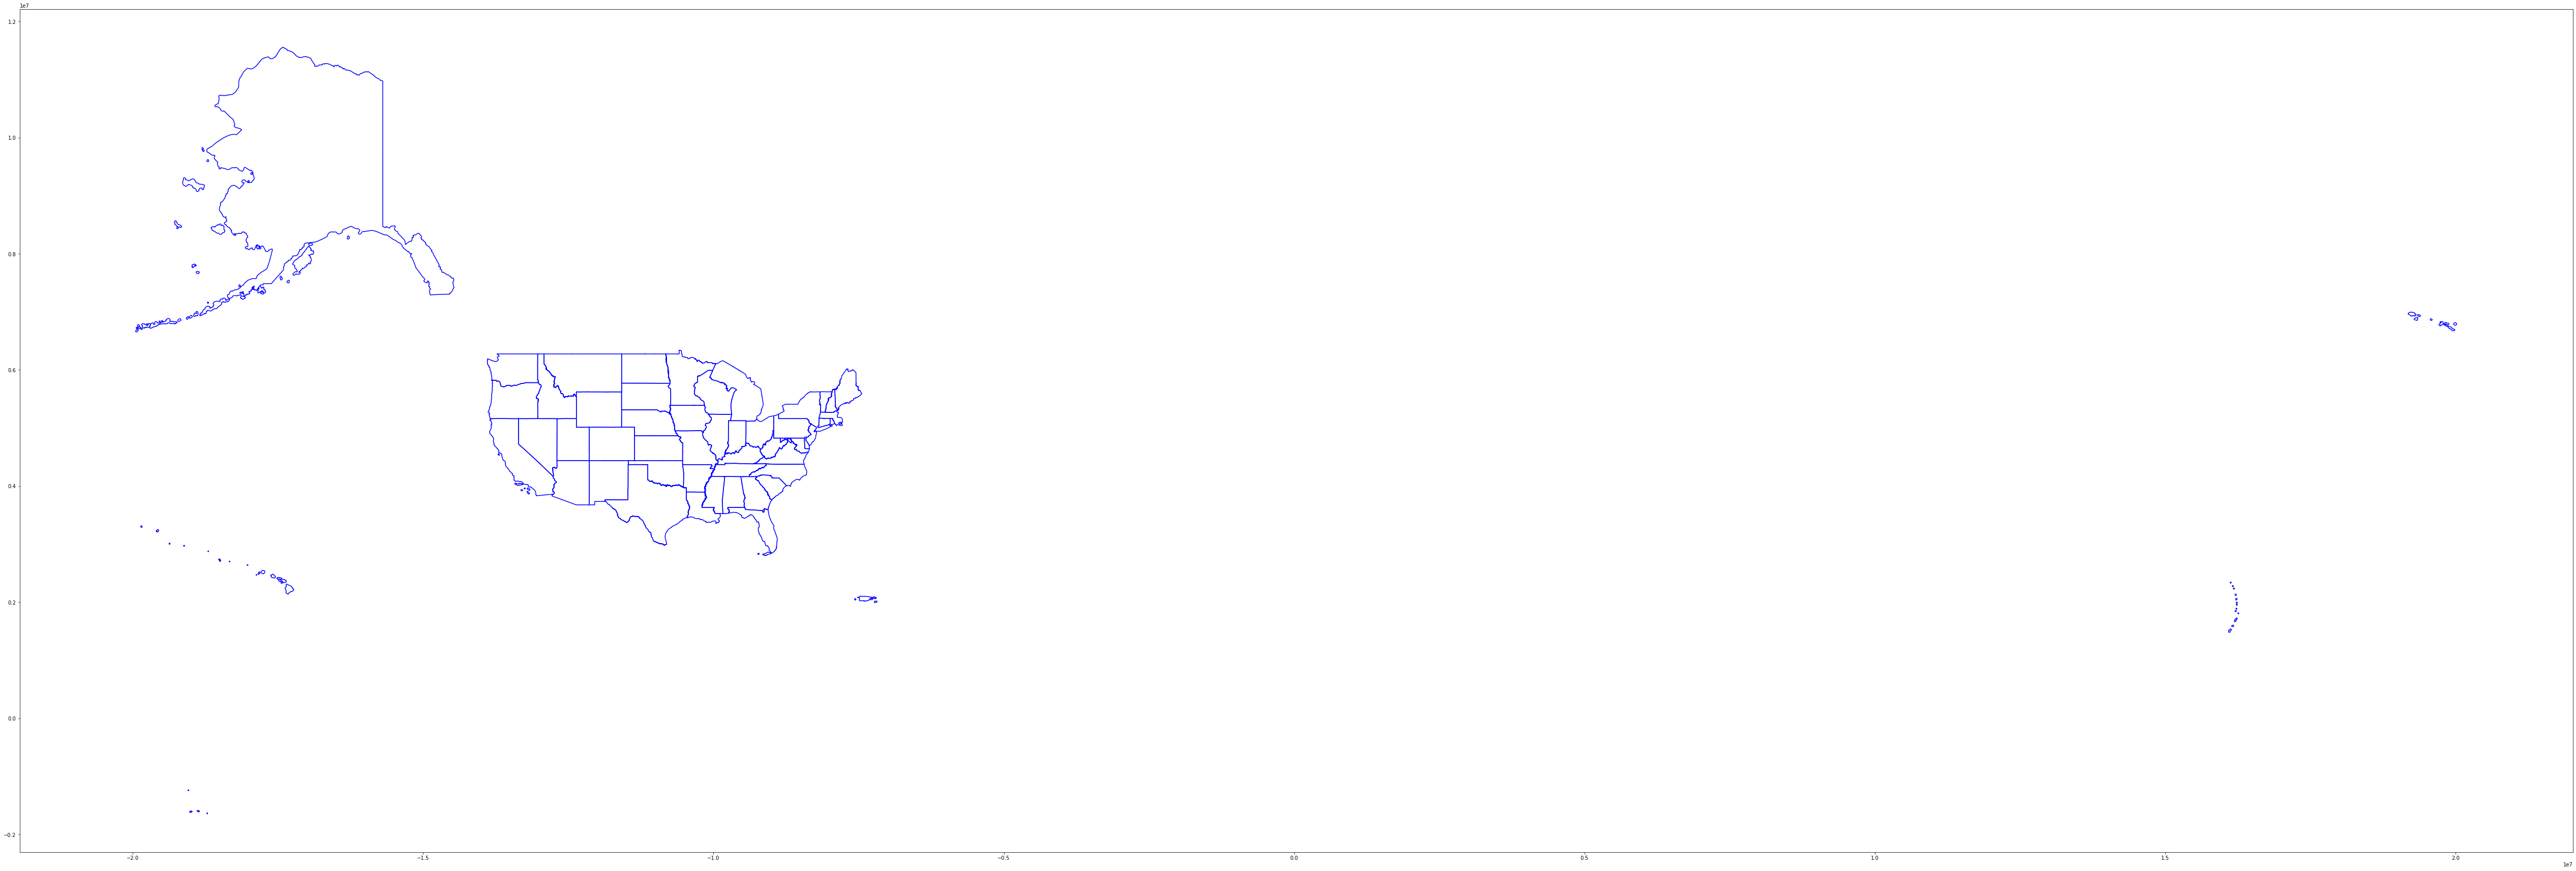

In [5]:
#map of state boundaries. 
states_shp.boundary.plot(figsize=(90, 60), color ='b')


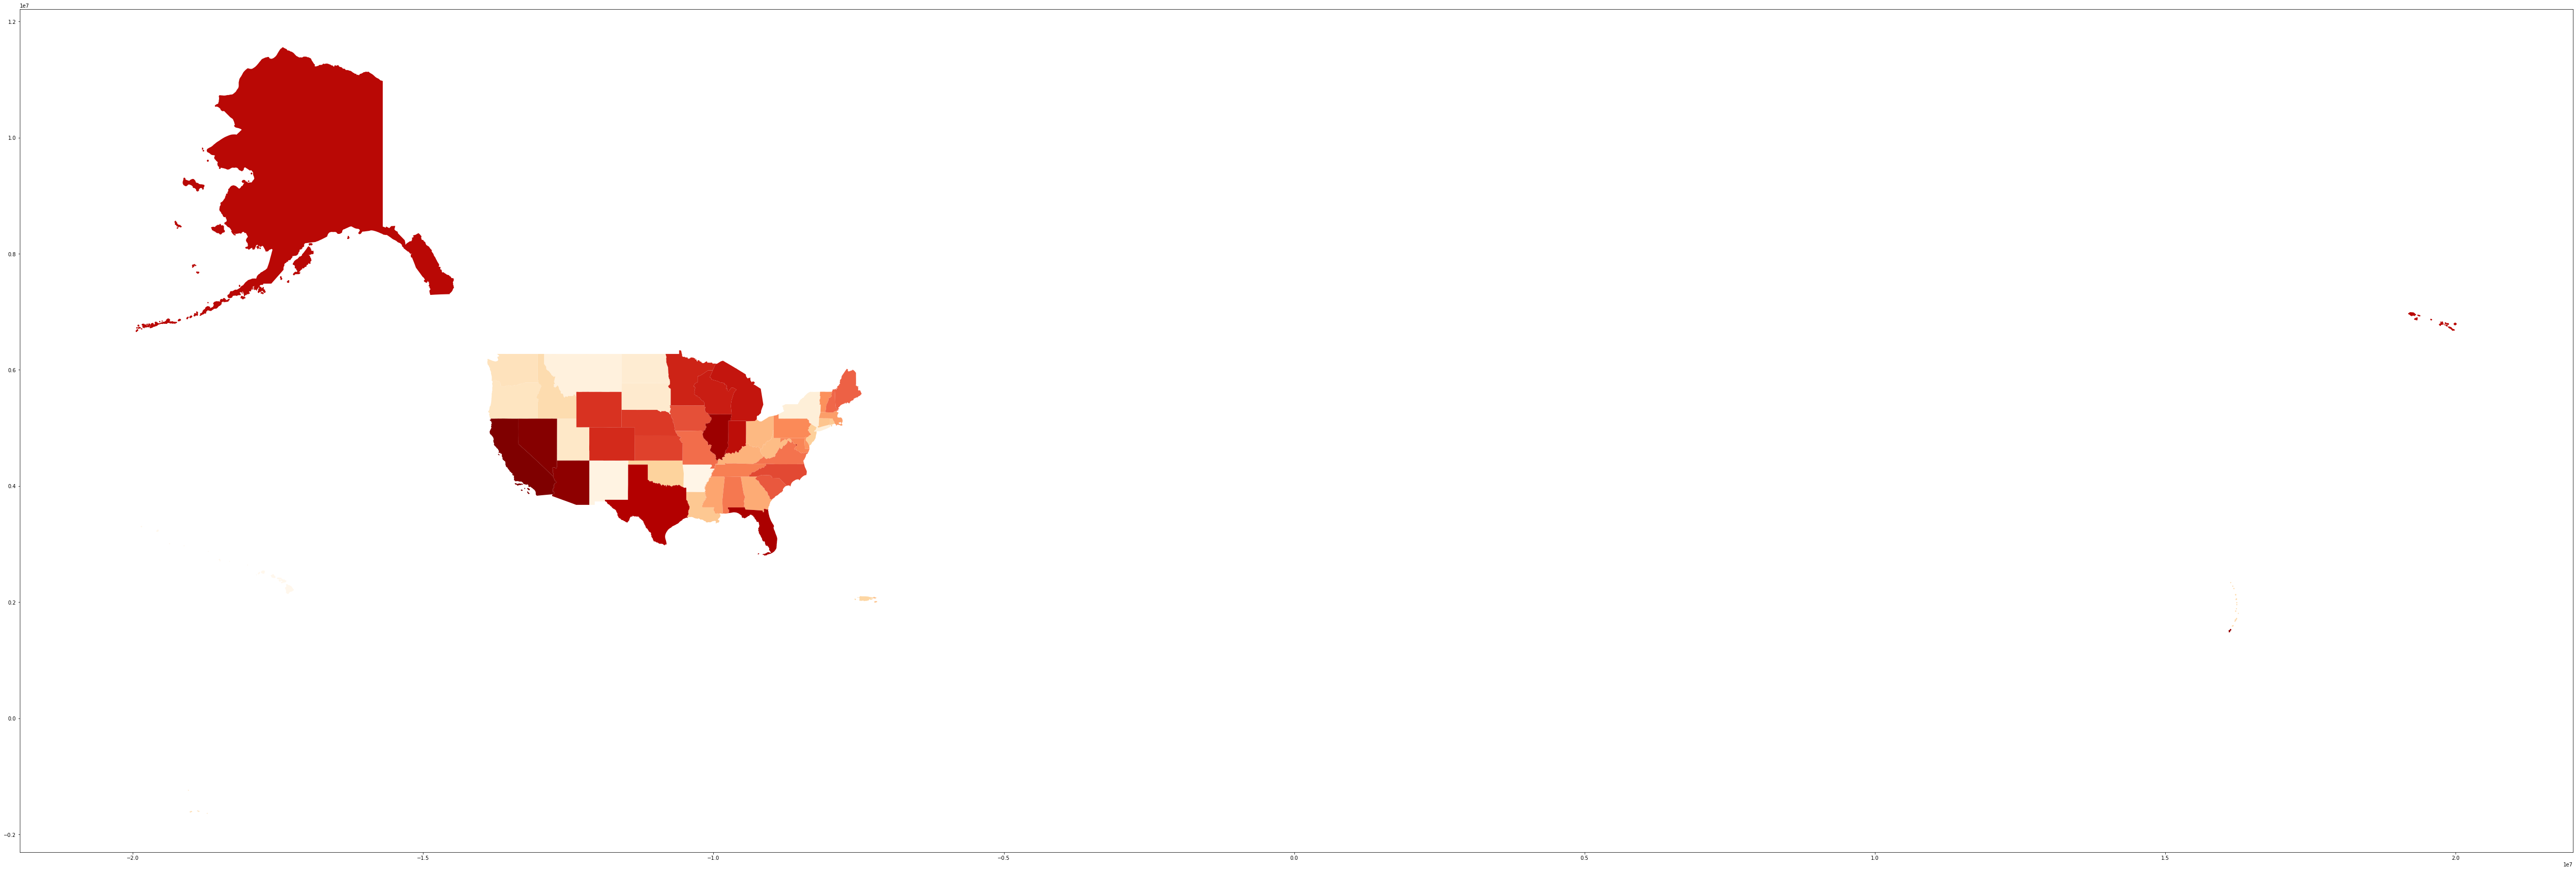

In [6]:
#Different colors. 
states_shp.plot(cmap='OrRd', figsize=(90, 60))
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

In [7]:
#Map of North America using naturalearth_lowres library 
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#https://geopandas.org/en/stable/docs/user_guide/mapping.html
#https://stackoverflow.com/questions/51621615/which-geopandas-datasets-maps-are-available

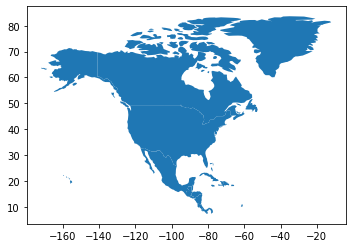

In [8]:
worldMap = world_data [world_data.continent == 'North America'].plot()

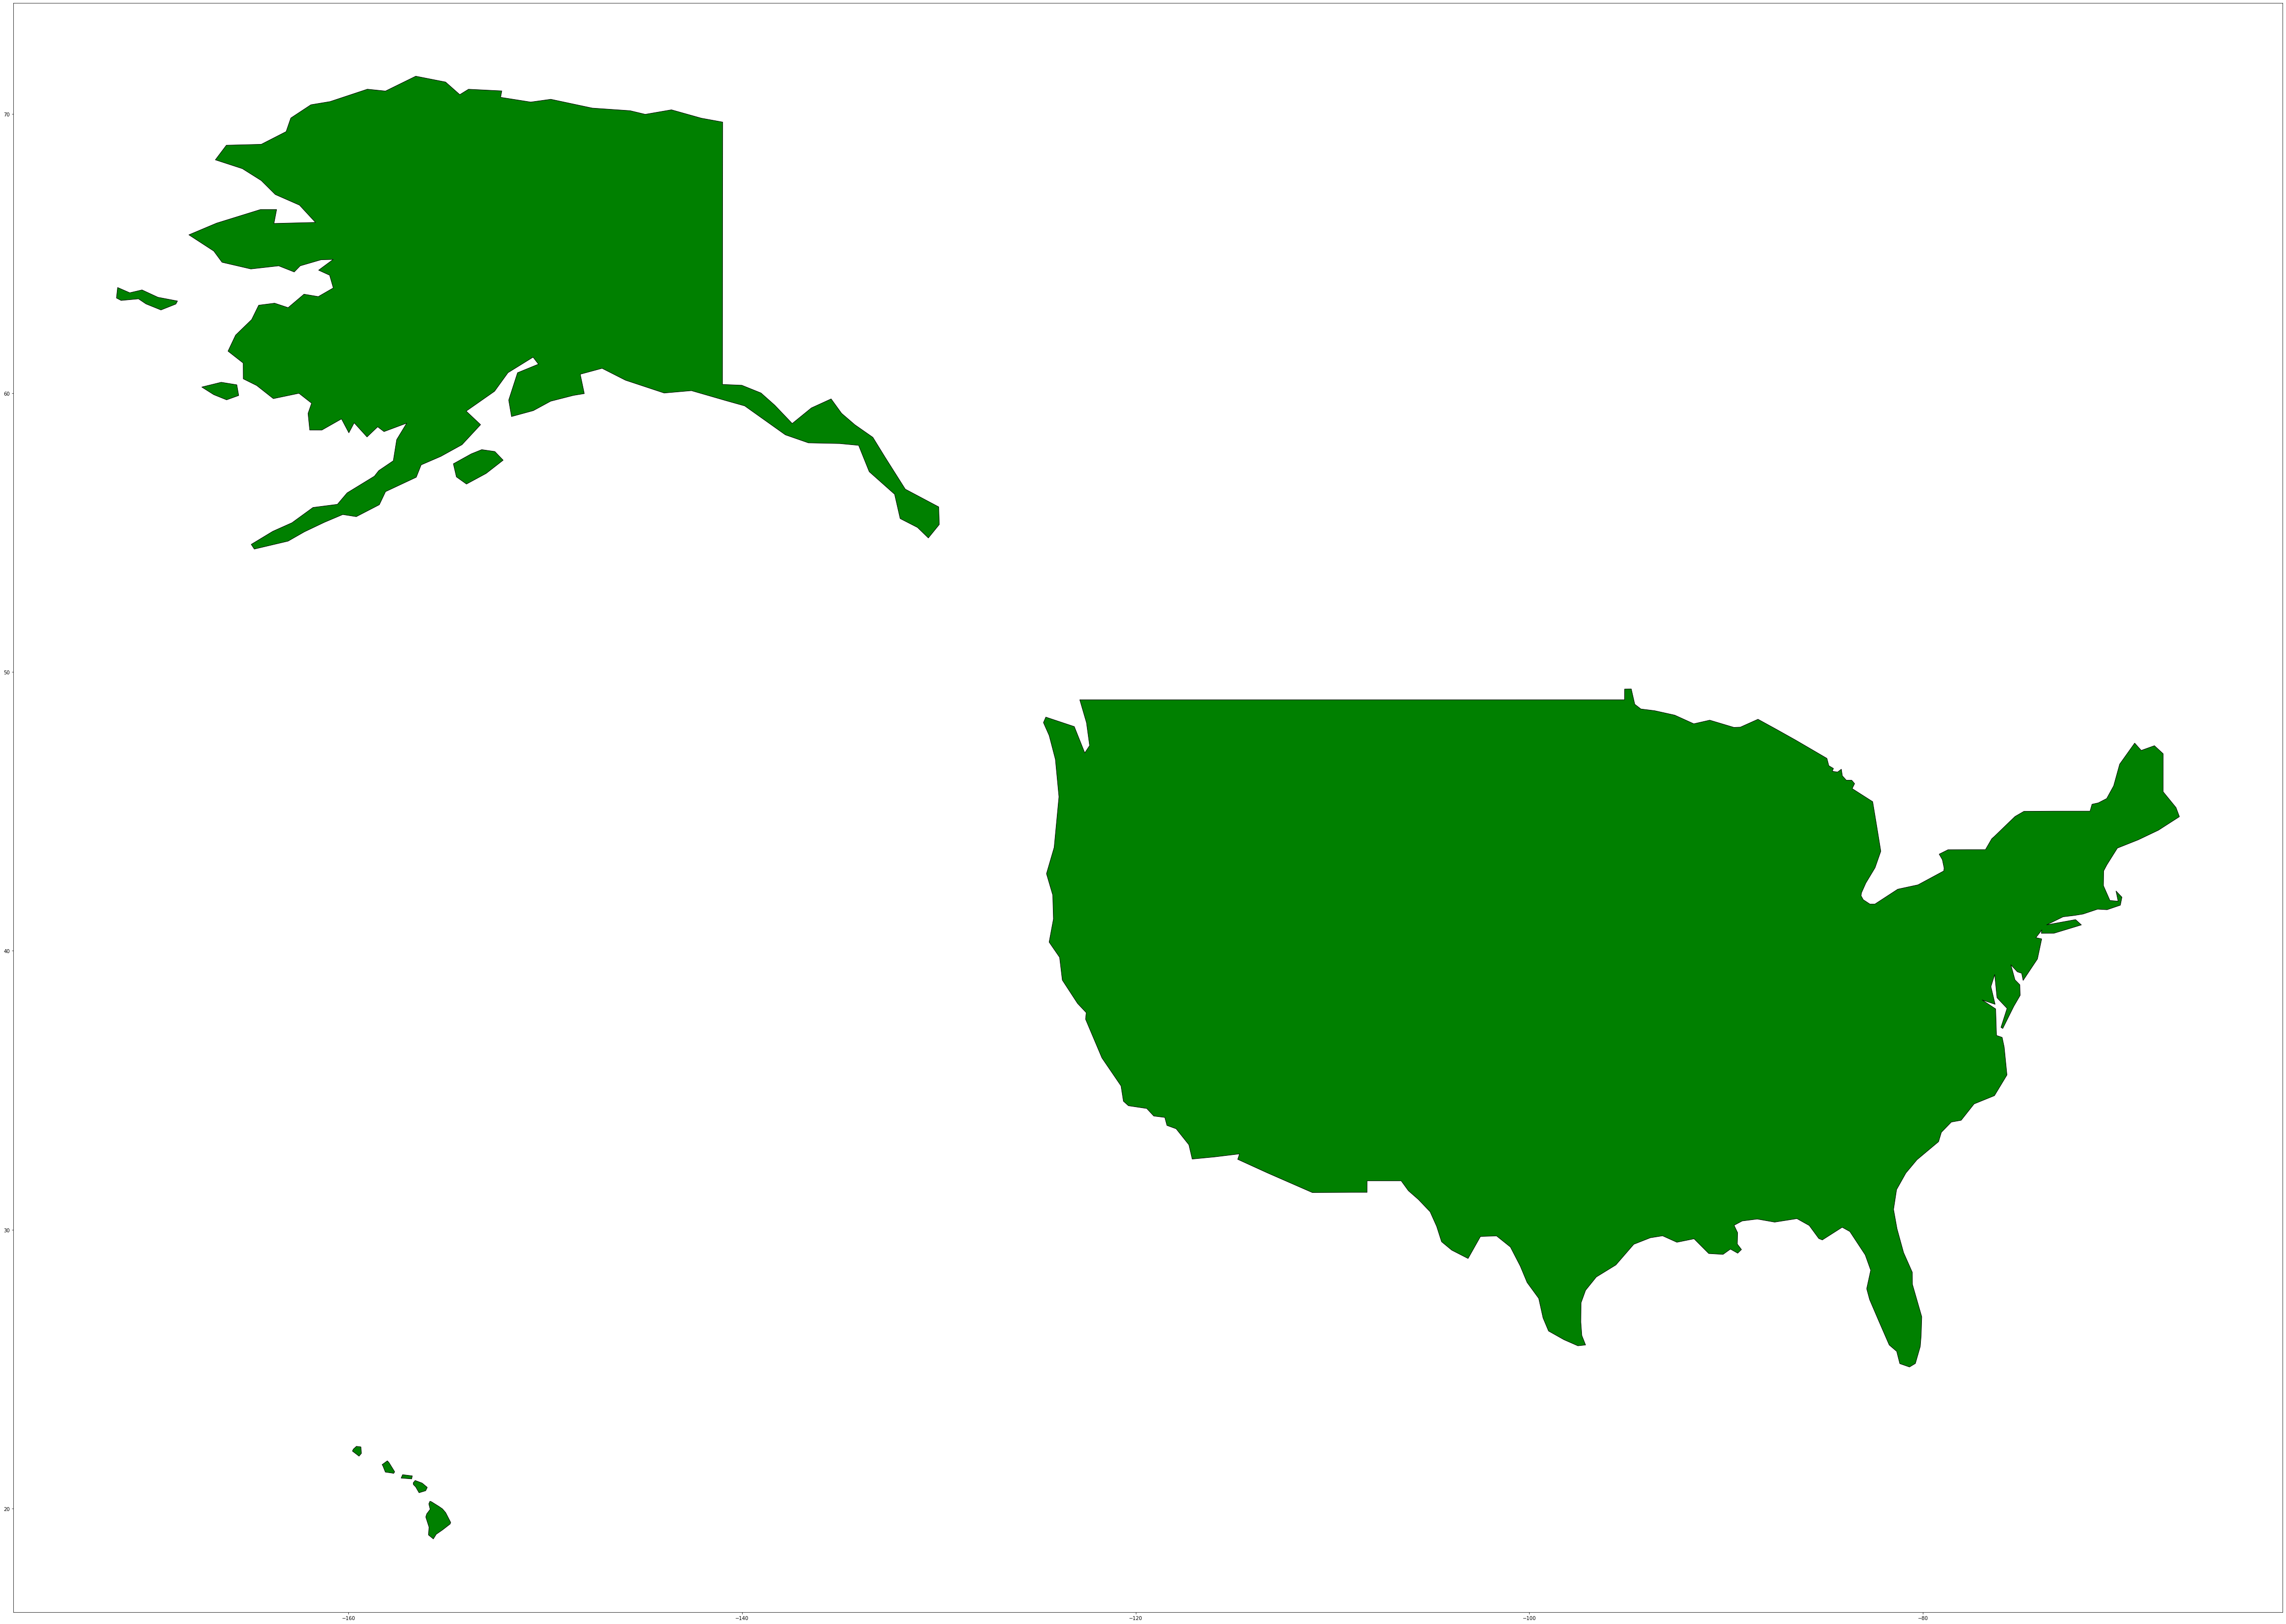

In [9]:
# Specify naturalearth_lowres to the United States 
USA = world_data.loc[world_data['name'] == 'United States of America']
USA.plot(figsize=(90,60), edgecolor='black', color = 'g')


In [10]:
#Centers the map on the United States 
map_usa = folium.Map(location=[37, -95], zoom_start=4)

walla = (46.0646, -118.3430)
portland = (45.5231, -122.6765)
sanFran = (37.7749, -122.4194)
hoodRiver = (45.7058, -121.5217)
losAng = (34.0522, -118.2437)
newYork = (40.7128, -74.0060)
boston = (42.3601, -71.0589)
orlando = (28.5383, -81.3792)
cabo = (22.8905, -109.9167)

# Add a marker for New York City
folium.Marker(location=list(newYork), popup='New York City').add_to(map_usa)

# Add a marker for Los Angeles
folium.Marker(location=list(losAng), popup='Los Angeles').add_to(map_usa)

# Walla Walla 
folium.Marker(location=list(walla), popup='Walla Walla', icon=folium.Icon(color='red')).add_to(map_usa)

# Hood River -- my home
folium.Marker(location=list(hoodRiver), popup='Hood River').add_to(map_usa)

# Portland
folium.Marker(location=list(portland), popup='Portland').add_to(map_usa)

# Orlando 
folium.Marker(location=list(orlando), popup='Orlando').add_to(map_usa)

# Cabo 
folium.Marker(location=list(cabo), popup='Cabo').add_to(map_usa)

# Boston
folium.Marker(location=list(boston), popup='Boston').add_to(map_usa)

# San Francisco  
folium.Marker(location=list(sanFran), popup='San Francisco').add_to(map_usa)


# Create a polyline between two or more cities.
polyline = [walla, portland, sanFran, losAng, newYork, boston]

# Add the red polyline to the map.
folium.PolyLine(locations=polyline, color='red', dash_array='1, 5').add_to(map_usa)

# Display the map.
map_usa


#https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94

In [11]:
#import CSV with State names and latitude and logitude data locations. 
states_csvv = gpd.read_file('states.csv')
states_csvv
#https://developers.google.com/public-data/docs/canonical/states_csv

,state,latitude,longitude,geometry
0,Alabama,32.7794,-86.8287,None
1,Alaska,64.0685,-152.2782,None
2,Arizona,34.2744,-111.6602,None
3,Arkansas,34.8938,-92.4426,None
4,California,37.1841,-119.4696,None
5,Colorado,38.9972,-105.5478,None
6,Connecticut,41.6219,-72.7273,None
7,Delaware,38.9896,-75.5050,None
8,District of Columbia,38.9101,-77.0147,None
9,Florida,28.6305,-82.4497,None


In [12]:
#Iterate over the dataframe and assign latitude and longitude coordinates to each State Name 
state_vars = [(row['state'].replace(' ', '_'), 
               [row['latitude'], row['longitude']]) for index, row in states_csvv.iterrows()]
state_vars


[('Alabama', ['32.7794', '-86.8287']),
 ('Alaska', ['64.0685', '-152.2782']),
 ('Arizona', ['34.2744', '-111.6602']),
 ('Arkansas', ['34.8938', '-92.4426']),
 ('California', ['37.1841', '-119.4696']),
 ('Colorado', ['38.9972', '-105.5478']),
 ('Connecticut', ['41.6219', '-72.7273']),
 ('Delaware', ['38.9896', '-75.5050']),
 ('District_of_Columbia', ['38.9101', '-77.0147']),
 ('Florida', ['28.6305', '-82.4497']),
 ('Georgia', ['32.6415', '-83.4426']),
 ('Hawaii', ['20.2927', '-156.3737']),
 ('Idaho', ['44.3509', '-114.6130']),
 ('Illinois', ['40.0417', '-89.1965']),
 ('Indiana', ['39.8942', '-86.2816']),
 ('Iowa', ['42.0751', '-93.4960']),
 ('Kansas', ['38.4937', '-98.3804']),
 ('Kentucky', ['37.5347', '-85.3021']),
 ('Louisiana', ['31.0689', '-91.9968']),
 ('Maine', ['45.3695', '-69.2428']),
 ('Maryland', ['39.0550', '-76.7909']),
 ('Massachusetts', ['42.2596', '-71.8083']),
 ('Michigan', ['44.3467', '-85.4102']),
 ('Minnesota', ['46.2807', '-94.3053']),
 ('Mississippi', ['32.7364', '-

In [13]:
#Creates a new folium map and places a marker on each US State. 
map_all = folium.Map(location=[37, -95], zoom_start=4) 
for state_var in state_vars:
    folium.Marker(location=state_var[1], popup=state_var[0]).add_to(map_all)
    
map_all

In [14]:
#Map that zooms in on Whitman College with a different map style
map_Whitman = folium.Map(location=[46.0708, -118.3296],
                    zoom_start = 42) 
map_Whitman 
#https://www.kaggle.com/code/daveianhickey/how-to-folium-for-maps-heatmaps-time-data

In [15]:
#Map that zooms in on Whitman College with a different map style and a red circle around the college. 
map_Whitman = folium.Map(location=[46.0708, -118.3296], tiles = "Stamen Toner",
                    zoom_start = 30) 
folium.Circle(location=[46.0646, -118.3430], radius=50000, color='red', fill_color='red').add_to(map_Whitman)

map_Whitman 
#https://www.kaggle.com/code/daveianhickey/how-to-folium-for-maps-heatmaps-time-data
